In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from statsmodels.tsa.stattools import acf
from dateutil.parser import isoparse
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Set universal font sizes using rcParams
plt.rcParams['axes.labelsize'] = 17  # For x and y labels
plt.rcParams['xtick.labelsize'] = 15  # For x-ticks
plt.rcParams['ytick.labelsize'] = 15  # For y-ticks
plt.rcParams['legend.fontsize'] = 15  # For legend
plt.rcParams['axes.titlesize'] = 17

In [2]:
def read_weekly_failures(input_csv):
    df = pd.read_csv(input_csv)
    failures_list = df['number_of_failures'].tolist()
    failures = pd.Series(failures_list)
    return failures

In [3]:
def calculate_acf_values(weekly_failures):
    acf_values = acf(weekly_failures, nlags=60)  # You can adjust the number of lags as needed
    return acf_values

In [4]:
def generate_plot(alpine_acf, camp_acf):
    plt.figure(figsize=(4, 3))
    plt.scatter(range(len(alpine_acf)), alpine_acf, color='orangered', s=20, marker='o', facecolors='none', label='Alpine')
    plt.scatter(range(len(camp_acf)), camp_acf, color='mediumseagreen', s=20, marker='o', facecolors='none', label='Campaign')

    
    plt.legend()
    plt.xlim(0, len(alpine_acf))  # Adjust the range as needed
    plt.xlabel('Lag (weeks)')
    plt.ylabel('Autocorrelation')
    xticks = [0, 20, 40, 60]
    plt.xticks(xticks, labels=xticks)
    yticks = [0, 0.25, 0.50, 0.75, 1.00]
    ytick_labels = [0, 0.25, 0.50, 0.75, 1.00]
    plt.yticks(yticks, labels=ytick_labels)
    plt.grid(True, linestyle=':', alpha=0.8)
    formatter = mticker.FormatStrFormatter('%.2f')
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.tight_layout()
    plt.savefig('autocorrelation.pdf', bbox_inches='tight')

    plt.show()

In [5]:
def main():
    alpine_weekly = read_weekly_failures("alpine_weekly_numbers.csv")
    camp_weekly = read_weekly_failures("camp_weekly_numbers.csv")
    
    alpine_acf = calculate_acf_values(alpine_weekly)
    camp_acf = calculate_acf_values(camp_weekly)
    
    generate_plot(alpine_acf, camp_acf)

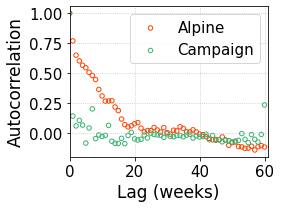

In [6]:
if __name__ == "__main__":
    main()